# SARIMA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Carregar o conjunto de dados
df = pd.read_csv('../data/commerce_dataset_clean.csv', sep=';')

In [3]:
# Converter a coluna 'dtme' para datetime e definir como índice do DataFrame
df['dtme'] = pd.to_datetime(df['dtme'])
df.set_index('dtme', inplace=True)

## SARIMA

In [4]:
# Aggregate sales data by day
daily_sales = df['total'].resample('D').sum()

# Split the data into 20% training and 80% testing
split_point = int(len(daily_sales) * 0.5)
train_data, test_data = daily_sales[:split_point], daily_sales[split_point:]

# Define new SARIMA parameters
p, d, q = 2, 1, 2  # Non-seasonal components
P, D, Q, m = 1, 1, 2, 7  # Seasonal components

# Initialize and fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Forecast on the test dataset
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Summary of the model
model_fit.summary()

/Users/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42893D+00    |proj g|=  8.97107D-01

At iterate    5    f=  7.32650D+00    |proj g|=  2.74421D-02

At iterate   10    f=  7.27487D+00    |proj g|=  4.02395D-02

At iterate   15    f=  7.26977D+00    |proj g|=  5.81213D-03

At iterate   20    f=  7.26762D+00    |proj g|=  3.85611D-02

At iterate   25    f=  7.26460D+00    |proj g|=  1.06209D-01

At iterate   30    f=  7.24324D+00    |proj g|=  1.73281D-02

At iterate   35    f=  7.23818D+00    |proj g|=  1.43934D-02

At iterate   40    f=  7.23748D+00    |proj g|=  3.12877D-04

At iterate   45    f=  7.23747D+00    |proj g|=  1.55069D-03

At iterate   50    f=  7.23730D+00    |proj g|=  7.92903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/kiwi/coding/PY-PROJECTS/Desafio-Grao/.venv/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                   44
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 7)   Log Likelihood                -318.441
Date:                           Tue, 27 Feb 2024   AIC                            652.882
Time:                                   14:40:16   BIC                            665.551
Sample:                               01-01-2019   HQIC                           657.304
                                    - 02-13-2019                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1203      1.959      0.061      0.951      -3.719       3.960
ar.L2         -0.2473      0.369     -0.669      0.503      -0.971       0.477
ma.L1         -0.9388      1.989     -0.472      0.637      -4.836       2.959
ma.L2          0.1229      1.844      0.067      0.947      -3.491       3.736
ar.S.L7        0.4957     24.599      0.020      0.984     -47.717      48.709
ma.S.L7       -1.0004     24.374     -0.041      0.967     -48.772      46.771
ma.S.L14       0.2766     12.178      0.023      0.982     -23.593      24.146
sigma2      3.821e+06   1.63e+06      2.351      0.019    6.35e+05    7.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.64   Prob(JB):                         0.90
Heteroskedasticity (H):               2.06   Skew:                            -0.18
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

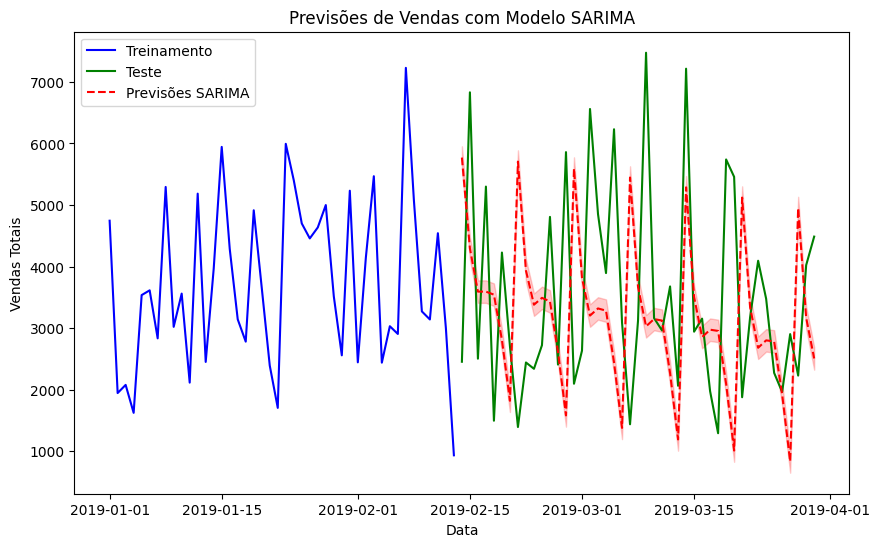

In [5]:
# Realizar previsões com o modelo ajustado
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Treinamento', color='blue')
plt.plot(test_data.index, test_data, label='Teste', color='green')
plt.plot(predictions.index, predictions, label='Previsões SARIMA', color='red', linestyle='--')
plt.fill_between(predictions.index, predictions - predictions.sem(), predictions + predictions.sem(), color='red', alpha=0.2)
plt.legend()
plt.title('Previsões de Vendas com Modelo SARIMA')
plt.xlabel('Data')
plt.ylabel('Vendas Totais')
plt.show()